In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
N=np.random.seed(1000)

In [32]:
A=np.random.randn(1000,10)

In [33]:
epsilon=np.random.randn(1000,1)

In [34]:
x_bar=[]
for i in range(10):
  if i%2==0:
    x_bar.append([np.random.uniform(-i-2,-i-1)])
  else:
    x_bar.append([np.random.uniform(i+1,i+2)])
x_bar = np.array(x_bar)

In [35]:
y= np.add(np.matmul(A,x_bar),epsilon)

In [36]:
#Now we will define a function which will compute and return the function value 
def evalf(x, n):  
  #Input: x is a numpy array of size n 
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  fval = np.linalg.norm(np.matmul(A,x) - y)
  fval = 0.5 * (fval)**2
  return (fval)

In [37]:
def evalg(x, n):
  assert type(x) is np.ndarray 
  assert len(x) == n
  return np.matmul(A.T, np.matmul(A, x) - y)


In [38]:
def evalh(x,n):
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  return np.matmul(A.T,A)

In [39]:
def compute_B_k(l, y, B_k, n):
  assert type(l) is np.ndarray #do not allow arbitrary type arguments 
  assert type(y) is np.ndarray #do not allow arbitrary type arguments 
  assert type(B_k) is np.ndarray #do not allow arbitrary type arguments 
  assert len(l) == n and len(y) == n #do not allow arbitrary size arguments 
  
  mu = 1 / np.dot(y, l)
  I = np.identity(n)
  a = np.subtract(I,  np.outer(np.multiply(mu, l), np.transpose(y)))
  b = np.subtract(I,  np.outer(np.multiply(mu, y), np.transpose(l)))
  c = np.outer(np.multiply(mu, l), np.transpose(l))
  d = np.matmul(np.matmul(a, B_k), b)
  z = np.add(d, c)
  return z

In [40]:
def compute_D_k(x,n):
  assert type(x) is np.ndarray
  assert len(x) == n
  hess = evalh(x,n)
  return np.linalg.inv(hess)

In [41]:
def compute_steplength_backtracking_scaled_direction(x,n, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == n
  assert type(gradf) is np.ndarray and len(gradf) == n
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  
  #Complete the code 
  alpha = alpha_start
  gradf = evalg(x,n)
  p=direction
  #np.matmul(np.matrix.transpose(gradf), p)
  while evalf(x+alpha*p,n) > evalf(x,n) + gamma*alpha*np.matmul(np.matrix.transpose(gradf), p) :
    alpha = rho*alpha
  return alpha

In [42]:
#line search type
BACKTRACKING_LINE_SEARCH = 1

In [43]:
import math
def find_minimizer_Newtonmethod(start_x, n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary type arguments 
  assert len(start_x) == n #do not allow arbitrary size arguments 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x,n)
  h_x = evalh(x,n)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha_start = args[0]
      rho = args[1]
      gamma = args[2]
  k = 0
  
  x_newton =  []
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    #implement the Newton's method here
    D_k=np.linalg.inv(evalh(x,n))
    direction = np.matmul(D_k,-g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,n,g_x, direction, alpha_start, rho, gamma)  
    else:  
      raise ValueError('Line search type unknown. Please check!')
    x_newton.append(x)
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x)))
    k += 1 #increment iteration
    g_x = evalg(x, n) #compute gradient at new point
  return x, evalf(x,n), k,x_newton

In [44]:

def find_minimizer_BFGS_method(start_x, n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary type arguments 
  assert len(start_x) == n #do not allow arbitrary size arguments 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  x0 = x
  g_x = evalg(x,n)
  g0 = g_x

  
  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha_start = (args[0])
      rho = (args[1])
      gamma = (args[2])
  k = 0
  
  x_bfgs = []
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    #implement the Newton's method here
    
    x0 = x
    g_x = evalg(x,n)
    g0 = g_x

    if k==0:
      B_k=np.identity(n)
    else:
      I = np.identity(n)
      mu_k = 1/np.matmul(np.transpose(y_k),s_k)
      B_k = np.add(np.matmul(np.matmul(np.subtract(I, mu_k*np.outer( s_k, np.transpose(y_k))),B_k), np.subtract(I, mu_k*np.outer(y_k,np.transpose(s_k)))), mu_k*np.outer( s_k, np.transpose(s_k)))
    direction = np.matmul(B_k,-g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,n,g_x, direction, alpha_start, rho, gamma)     
    else:  
      raise ValueError('Line search type unknown. Please check!')
    x_bfgs.append(x)
    x = np.subtract(x, np.multiply(step_length,np.matmul(B_k, g_x)))
    g_x = evalg(x, n)
    s_k = x-x0 
    y_k=  g_x-g0
    k += 1 #increment iteration
  return x, evalf(x,n), k,x_bfgs

#Que-2.


$\textbf{Backtracking line Search(Newton Method)}:$

In [45]:
n = 10
alpha = 0.99
rho = 0.5
gamma = 0.5
my_tol= 1e-5
my_start_x =np.zeros((10, 1))
from timeit import default_timer as timer
start = timer()
x, opt_fval, num_iters, x_newton = find_minimizer_Newtonmethod(my_start_x, n, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
end = timer()
Time_newton = end-start
print("x*=", x, "\nx_bar=-", x_bar)
print("\n\nf*=",opt_fval, "\nf_bar=", evalf(x_bar,n))
print('Iterations=',num_iters)

x*= [[-1.52615747]
 [ 2.35933586]
 [-3.71408745]
 [ 4.65508607]
 [-5.79228265]
 [ 6.05590254]
 [-7.25518888]
 [ 8.32369299]
 [-9.87348466]
 [10.71878165]] 
x_bar=- [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]


f*= 504.5963652036184 
f_bar= 508.51427768443995
Iterations= 5


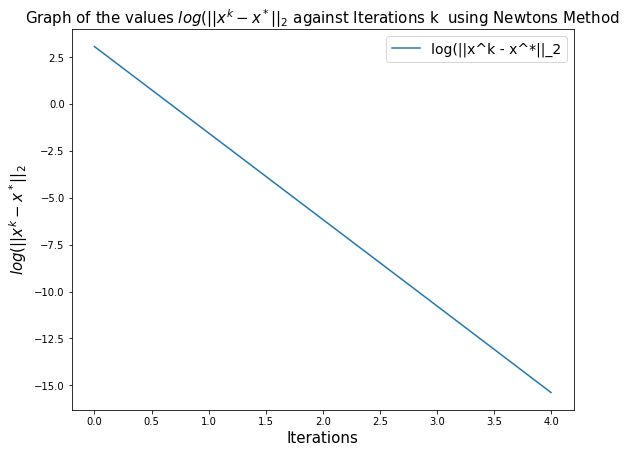

In [46]:
plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(x_newton))], [math.log(np.linalg.norm(x_newton[k]-x)) for k in range(len(x_newton))],label=r'$ $')
plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k  using Newtons Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||x^k - x^*||_2$',fontsize=15)
plt.legend(['log(||x^k - x^*||_2'],fontsize=14)
plt.show()

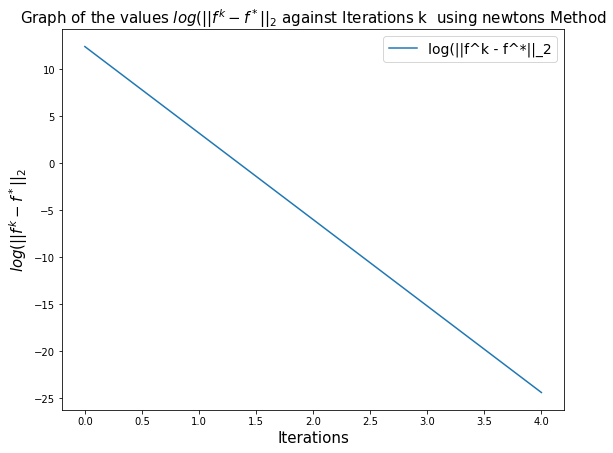

In [47]:
plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(x_newton))],[math.log(abs(evalf(x_newton[k],n)-opt_fval)) for k in range(len(x_newton))], label=r'$ $')
plt.title(r'Graph of the values $log(||f^k - f^*||_2$ against Iterations k  using newtons Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||f^k - f^*||_2$',fontsize=15)
plt.legend(['log(||f^k - f^*||_2'],fontsize=14)
plt.show()

$ \textbf{Comment on the convergence rates of the iterates and the objective function values, by recalling thedefinitions given above.}$  \\
We see that  the convergence here is Q linear.  \\

we can get this result by taking log of b0th sides in Q linear condition.

#Que3. 

$ \textbf{Backtracking line Search(BFGS Method)}:$

In [48]:
my_start_x =np.zeros((10, 1))
start = timer()
x, opt_fval, num_iters, x_bfgs= find_minimizer_BFGS_method(my_start_x,n,my_tol,BACKTRACKING_LINE_SEARCH,0.99, 0.5,0.5)
end = timer()
Time_bfgs = end-start
print("x*=", x, "\nx_bar=", x_bar)
print("\n\nf*=", opt_fval, "\nf_bar=", evalf(x_bar,n))
print('Iterations',num_iters)

x*= [[-1.52615747]
 [ 2.35933586]
 [-3.71408745]
 [ 4.65508607]
 [-5.79228265]
 [ 6.05590254]
 [-7.25518888]
 [ 8.32369299]
 [-9.87348467]
 [10.71878165]] 
x_bar= [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]


f*= 504.5963652036184 
f_bar= 508.51427768443995
Iterations 18


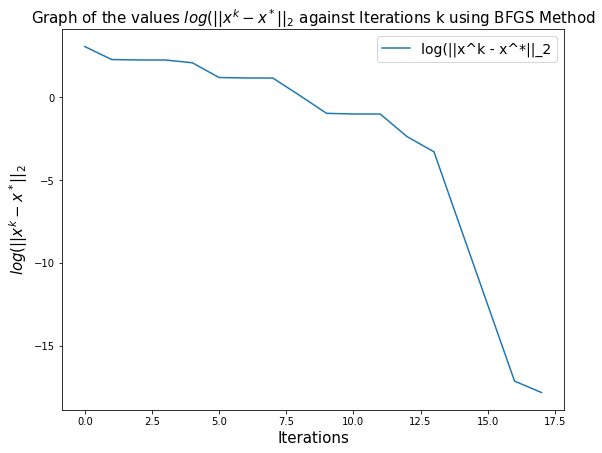

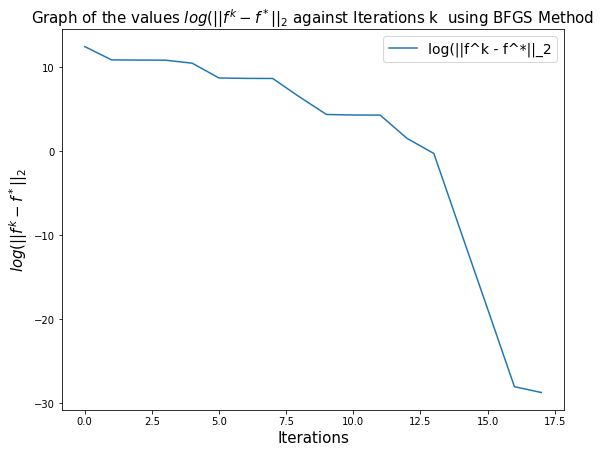

In [49]:
plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(x_bfgs))],[math.log(np.linalg.norm(x_bfgs[k]-x)) for k in range(len(x_bfgs))],label=r'$ $')
plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k using BFGS Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||x^k - x^*||_2$',fontsize=15)
plt.legend(['log(||x^k - x^*||_2'],fontsize=14)
plt.show()




plt.figure(figsize=(9,7))
plt.plot([i for i in np.arange(len(x_bfgs))], [math.log(abs(evalf(x_bfgs[k],n)-opt_fval)) for k in range(len(x_bfgs))],label=r'$ $')
plt.title(r'Graph of the values $log(||f^k - f^*||_2$ against Iterations k  using BFGS Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||f^k - f^*||_2$',fontsize=15)
plt.legend(['log(||f^k - f^*||_2'],fontsize=14)
plt.show()

$ \textbf{Comment on the convergence rates of the iterates and the objective function values}$  \\

We see that before iteration 12 the convergence rates of  the values $log(||x^k - x^*||_2$ against Iterations k  using BFGS method  is somewhat normal. and after iterations 12  the values $log(||x^k - x^*||_2$ is decreasing rapidly. However the convergence here is also Q linear.   \\


#Que4.
$\textbf{Compare and contrast the results obtained by Newton’s method and BFGS method.}$  \\

we see that by using Newton's Method the  convergence rates of the iterates and the objective function values as much faster as compare to the BFGS method. and the newton's method takes lesser time than the bfgs time which is also clear from number of iterations.

Function gets almost same minimum value by b0th methods.

In [50]:
print('Time using Newton: ',Time_newton)
print('Time using bfgs: ',Time_bfgs)


Time using Newton:  0.002818959999785875
Time using bfgs:  0.01489216700065299
